In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats

import octopus as oct

In [37]:
# Import data from mat-file
data = scipy.io.loadmat('VTrace_MEC_PTX_SING_Ctrl.mat')
Ctrl_MEC_PTX_alldata = (data['alldata'])

data = scipy.io.loadmat('VTrace_MEC_PTX_SING.mat')
Block_MEC_PTX_alldata = (data['alldata'])

In [38]:
Ctrl_MEC_PTX_meantrace = np.mean(Ctrl_MEC_PTX_alldata, axis=2)
Block_MEC_PTX_meantrace = np.mean(Block_MEC_PTX_alldata, axis=2)

In [39]:
dir=[0, 45, 90, 135, 180, 225, 270, 315, 360]
dir

[0, 45, 90, 135, 180, 225, 270, 315, 360]

In [40]:
time = np.linspace(-1,4,50001)
Ctrl_MEC_PTX_meandata = np.mean(Ctrl_MEC_PTX_alldata[10000:40000,:,:],0)
Block_MEC_PTX_meandata = np.mean(Block_MEC_PTX_alldata[10000:40000,:,:],0)

In [41]:
con = Ctrl_MEC_PTX_meandata[0,:]
con = np.expand_dims(con, axis=0)
Ctrl_MEC_PTX_meandata = np.concatenate((Ctrl_MEC_PTX_meandata, con), axis = 0)

con = Block_MEC_PTX_meandata[0,:]
con = np.expand_dims(con, axis=0)
Block_MEC_PTX_meandata = np.concatenate((Block_MEC_PTX_meandata, con), axis = 0)

In [42]:
Ctrl_MEC_PTX_meandata.shape

(9L, 2L)

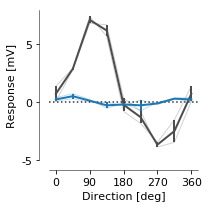

In [57]:
rotations = [0,45,90,135,180,225,270,315,360]
colors = sb.color_palette('husl')

fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(111)

plt.plot(rotations, Ctrl_MEC_PTX_meandata,color = '0.3', linewidth='1', alpha=0.25)
plt.errorbar(rotations, np.mean(Ctrl_MEC_PTX_meandata,1), yerr=stats.sem(Ctrl_MEC_PTX_meandata,1),
             color = '0.3', linewidth=2)
plt.plot(rotations, Block_MEC_PTX_meandata, color = 'C0', linewidth='1', alpha=0.25)
plt.errorbar(rotations, np.mean(Block_MEC_PTX_meandata,1), yerr=stats.sem(Block_MEC_PTX_meandata,1),
             color = 'C0', linewidth=2)

ax.axhline(y=0, color='0.2', linestyle=':')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['right'].set_position(('outward', 10))

ax.set_ylabel('Response [mV]', size=11)
ax.set_xlabel('Direction [deg]', size=11)
plt.xticks(rotations)
ax.set_xticklabels(rotations)
yticks = np.array([-10,-5,0,5,10])
ax.set_yticks(yticks)
ax.set_yticklabels(('-10','-5','0','5','10'), size=11)
plt.ylim([-5,8])
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)
xticks = np.array([0,90,180,270,360])
ax.set_xticks(xticks)
ax.set_xticklabels(('0','90','180','270','360'), size=11)

fig.tight_layout()

plt.savefig('X154_MEC_PTX_Ephys_DirTuning.pdf',bbox_inches='tight', format='pdf')

In [49]:
Ctrl_MEC_PTX_meandata.shape

(9L, 2L)

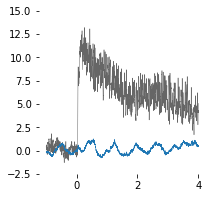

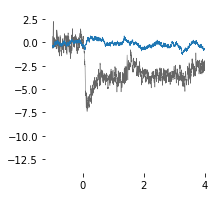

In [56]:
fig = plt.figure(figsize = (3,3))
#plt.subplots_adjust(wspace=0.5)

ax = fig.add_subplot(111)
plt.plot(time, Ctrl_MEC_PTX_meantrace[:,2], color='0.4', linewidth='0.5')
plt.plot(time, Block_MEC_PTX_meantrace[:,2], color='C0', linewidth='0.5')

#ax.axhline(y=0, color='0.2', linestyle=':')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
#ax.set_ylabel('Response [mV]', size=11)
#ax.set_xlabel('Time [s]', size=11)
plt.ylim([-2.5,15])

plt.savefig('X154_MEC_PTX_PD.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

fig = plt.figure(figsize = (3,3))
#plt.subplots_adjust(wspace=0.5)
ax = fig.add_subplot(111)
plt.plot(time, Ctrl_MEC_PTX_meantrace[:,6], color='0.4', linewidth='0.5')
plt.plot(time, Block_MEC_PTX_meantrace[:,6], color='C0', linewidth='0.5')

#ax.axhline(y=0, color='0.2', linestyle=':')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
#ax.set_ylabel('Response [mV]', size=11)
#ax.set_xlabel('Time [s]', size=11)
plt.ylim([-14,3.5])

plt.savefig('X154_MEC_PTX_ND.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()